In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
orders1=pd.read_csv('restaurant-1-orders.csv',parse_dates=['Order Date'],dayfirst=True)
orders1.columns=['order_number','date','item_name','quantity','product_price','total_products']
prices1=pd.read_csv('restaurant-1-products-price.csv')
prices1.columns=['item_name','product_price']

In [3]:
orders2=pd.read_csv('restaurant-2-orders.csv',parse_dates=['Order Date'],dayfirst=True)
orders2.columns=['order_number','date','item_name','quantity','product_price','total_products']
prices2=pd.read_csv('restaurant-2-products-price.csv')
prices2.columns=['item_name','product_price']

In [5]:
OrderPrices=orders1.quantity.mul(orders1.product_price).groupby(orders1.order_number).sum().reset_index(name='total_price')
orders1=orders1.merge(OrderPrices,how='left',on='order_number')

In [6]:
OrderPrices=orders2.quantity.mul(orders2.product_price).groupby(orders2.order_number).sum().reset_index(name='total_price')
orders2=orders2.merge(OrderPrices,how='left',on='order_number')

In [25]:
ordDate1=orders1.groupby('order_number').agg(date=('date','max'),total_products=('quantity','sum' ),price=('total_price','max') )
ordDate2=orders2.groupby('order_number').agg(date=('date','max'),total_products=('quantity','sum' ),price=('total_price','max') )

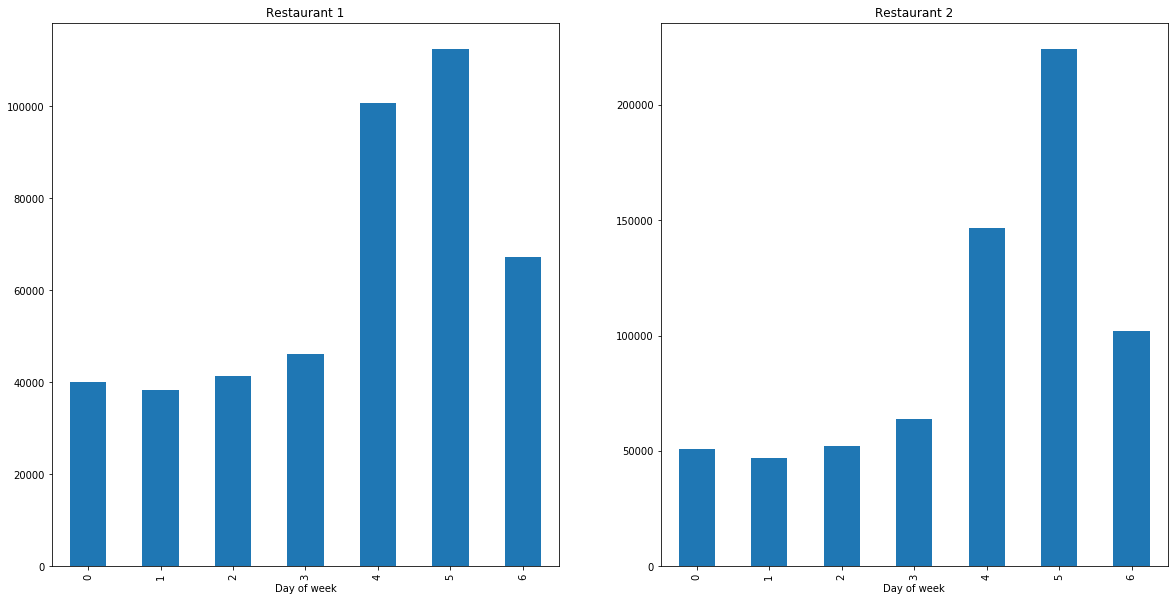

In [52]:
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(1,2)
ordDate1.groupby(ordDate1.date.dt.weekday)['price'].sum().plot(kind="bar",ax=ax[0])
#ax[0].hist(ordDate1.total_products,bins=100)
ax[0].set_xlabel('Day of week')
ax[0].title.set_text('Restaurant 1')

ordDate2.groupby(ordDate2.date.dt.weekday)['price'].sum().plot(kind="bar",ax=ax[1])
#ax[1].hist(ordDate2.total_products,bins=100)
ax[1].set_xlabel('Day of week')
ax[1].title.set_text('Restaurant 2')

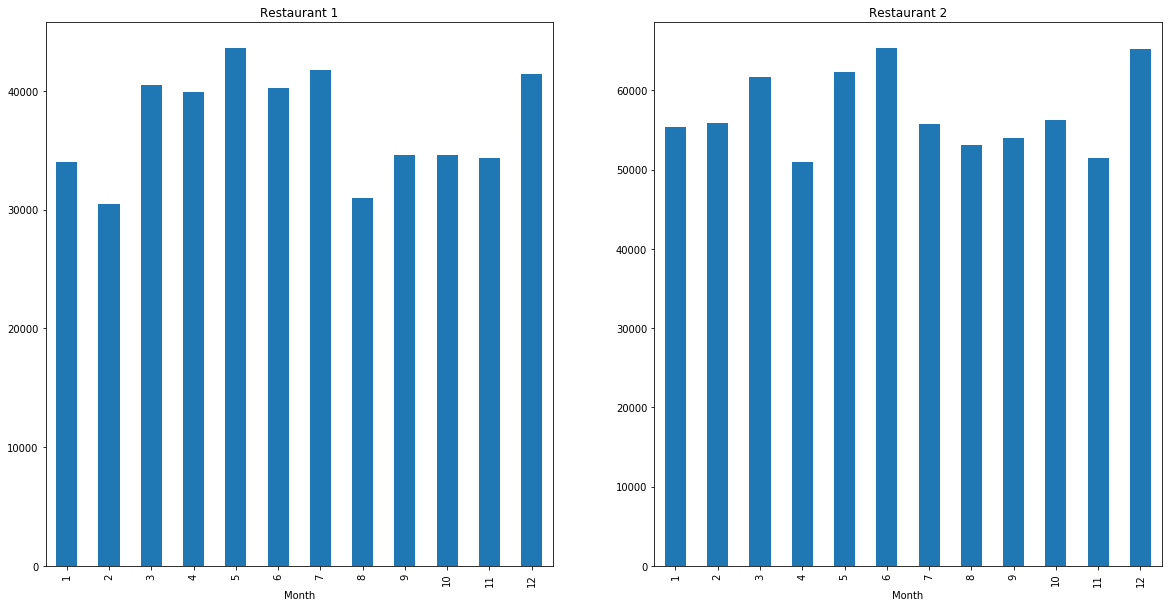

In [49]:
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(1,2)
ordDate1.groupby(ordDate1.date.dt.month)['price'].sum().plot(kind="bar",ax=ax[0])
#ax[0].hist(ordDate1.total_products,bins=100)
ax[0].set_xlabel('Month')
ax[0].title.set_text('Restaurant 1')

ordDate2.groupby(ordDate2.date.dt.month)['price'].sum().plot(kind="bar",ax=ax[1])
#ax[1].hist(ordDate2.total_products,bins=100)
ax[1].set_xlabel('Month')
ax[1].title.set_text('Restaurant 2')

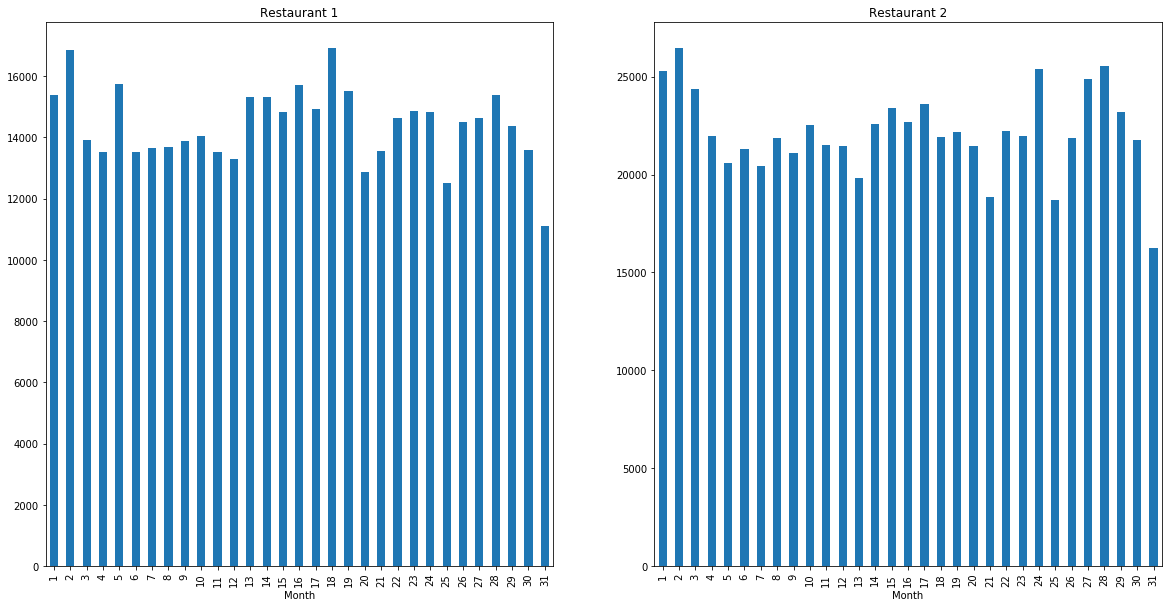

In [53]:
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(1,2)
ordDate1.groupby(ordDate1.date.dt.day)['price'].sum().plot(kind="bar",ax=ax[0])
#ax[0].hist(ordDate1.total_products,bins=100)
ax[0].set_xlabel('Month')
ax[0].title.set_text('Restaurant 1')

ordDate2.groupby(ordDate2.date.dt.day)['price'].sum().plot(kind="bar",ax=ax[1])
#ax[1].hist(ordDate2.total_products,bins=100)
ax[1].set_xlabel('Month')
ax[1].title.set_text('Restaurant 2')

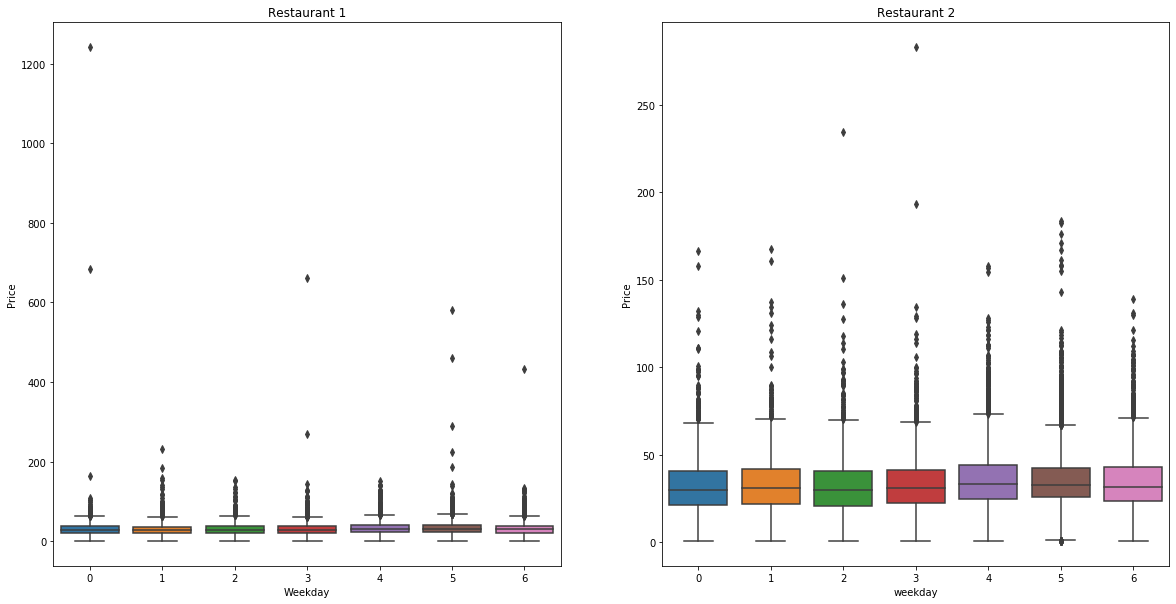

In [61]:
fig,ax=plt.subplots(1,2)
sns.boxplot(data=ordDate1, x=ordDate1.date.dt.weekday , y='price', ax=ax[0])
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Weekday')
ax[0].title.set_text('Restaurant 1')

sns.boxplot(data=ordDate2, x=ordDate2.date.dt.weekday , y='price', ax=ax[1])
ax[1].set_ylabel('Price')
ax[1].set_xlabel('weekday')
ax[1].title.set_text('Restaurant 2')


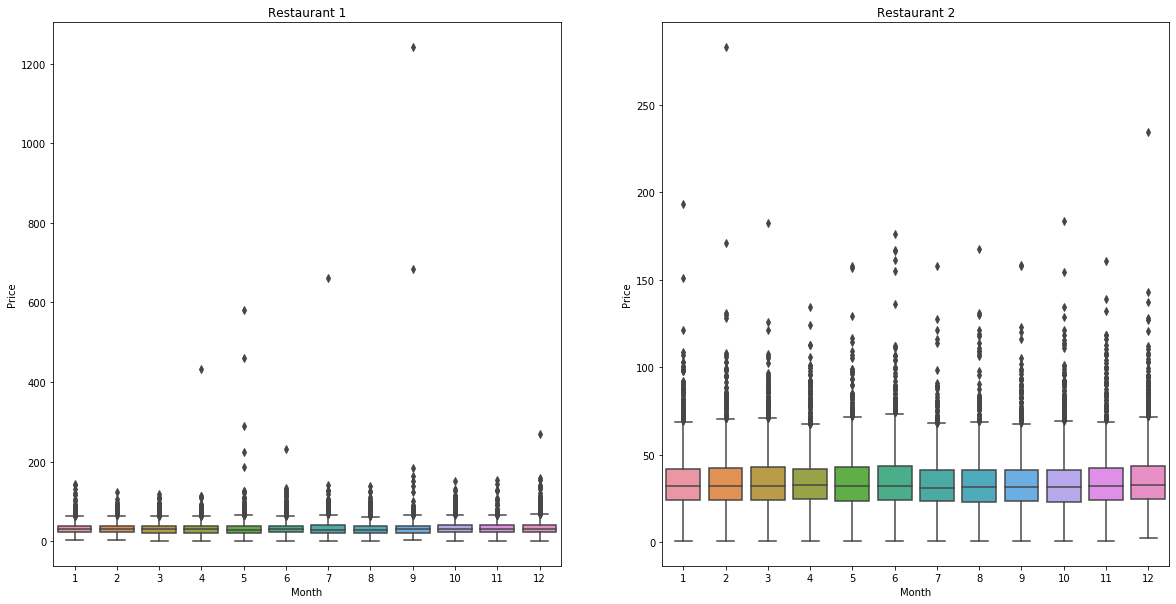

In [62]:
fig,ax=plt.subplots(1,2)
sns.boxplot(data=ordDate1, x=ordDate1.date.dt.month , y='price', ax=ax[0])
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Month')
ax[0].title.set_text('Restaurant 1')

sns.boxplot(data=ordDate2, x=ordDate2.date.dt.month , y='price', ax=ax[1])
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Month')
ax[1].title.set_text('Restaurant 2')


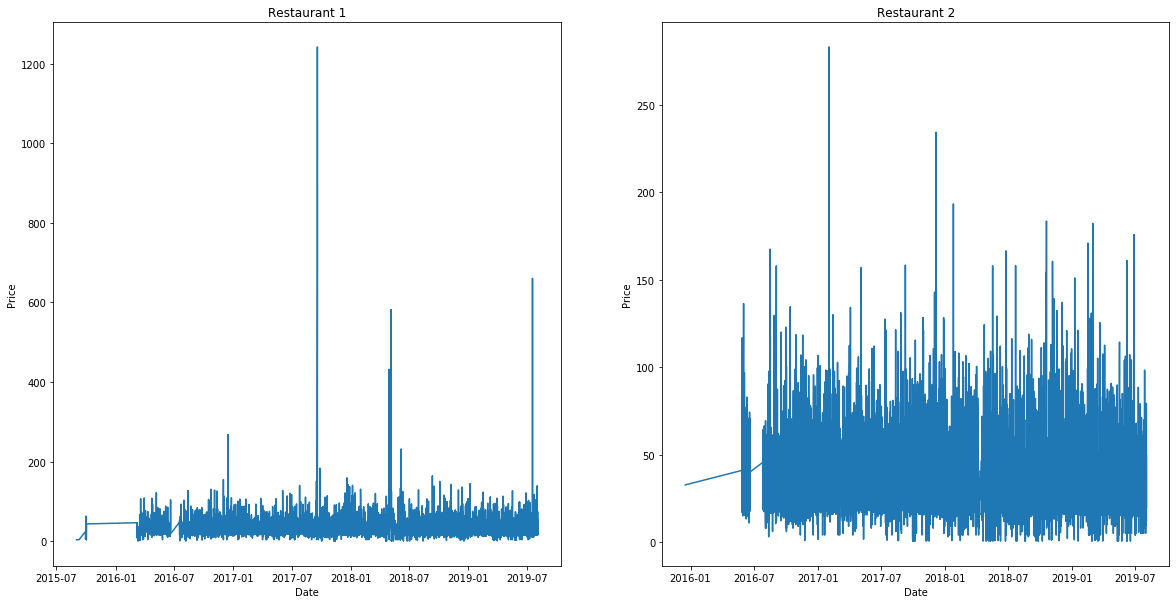

In [63]:
fig,ax=plt.subplots(1,2)
ax[0].plot(ordDate1.date ,ordDate1.price)
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Date')
ax[0].title.set_text('Restaurant 1')

ax[1].plot(ordDate2.date ,ordDate2.price)
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Date')
ax[1].title.set_text('Restaurant 2')

In [73]:
ordDate1.loc[ordDate1.date>'2016-06-19'].head(20)

,date,total_products,price
order_number,,,
2708,2016-06-19 13:53:00,8,29.40
2709,2016-06-19 16:46:00,6,30.00
2710,2016-06-19 17:07:00,12,50.60
2711,2016-06-19 17:10:00,9,45.85
2712,2016-06-19 17:41:00,5,31.75
2713,2016-06-19 17:55:00,18,56.65
2714,2016-06-19 18:04:00,11,50.65
2715,2016-06-19 18:21:00,6,33.70
2716,2016-06-19 18:47:00,23,104.15


In [74]:
ordDate2.loc[ordDate2.date>'2016-06-19'].head(20)

,date,total_products,price
order_number,,,
4834,2016-06-19 10:10:00,10,70.50
4835,2016-06-19 12:54:00,4,24.80
4836,2016-06-19 16:43:00,6,33.70
4837,2016-06-19 16:51:00,8,47.60
4838,2016-06-19 17:22:00,13,58.90
4839,2016-06-19 17:37:00,5,21.30
4840,2016-06-19 18:13:00,9,52.55
4841,2016-06-19 18:27:00,12,36.05
4842,2016-06-19 18:28:00,3,21.85


## Choose the time start from 2016-07-26

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [78]:
orderts_1=ordDate1.loc[(ordDate1.date>'2016-07-26') & (ordDate1.price<250) ]
orderts_2=ordDate2.loc[(ordDate2.date>'2016-07-26') & (ordDate2.price<250) ]

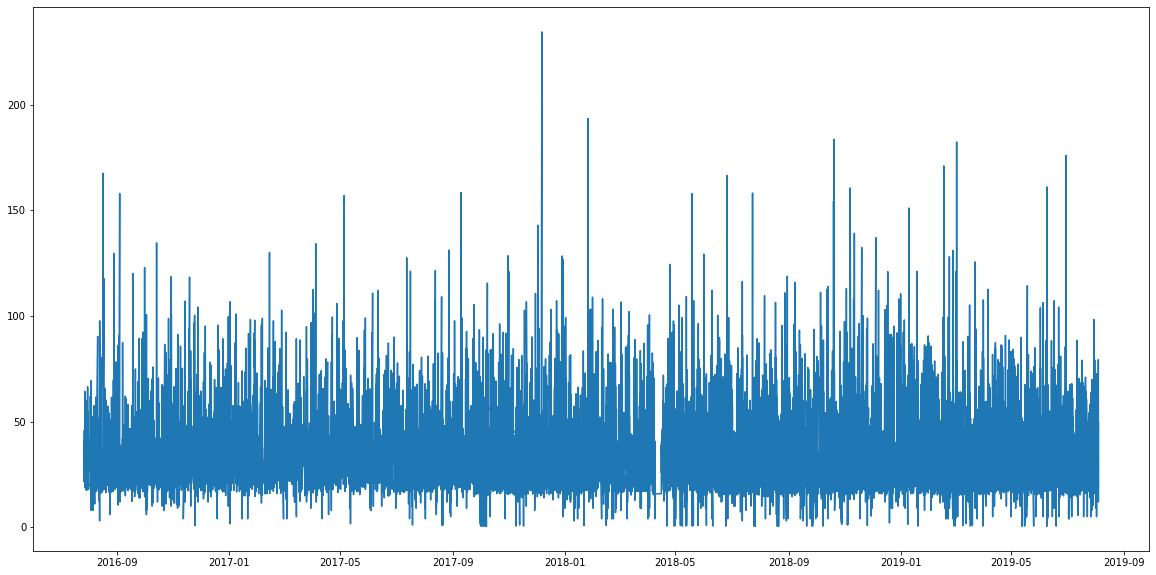

In [80]:
plt.plot(orderts_2.date,orderts_2.price)

In [81]:
temp=orderts_1.copy()

In [84]:
temp.set_index(orderts_1.date)

,date,total_products,price
date,,,
2016-07-26 18:34:00,2016-07-26 18:34:00,8,33.10
2016-07-27 19:56:00,2016-07-27 19:56:00,11,41.00
2016-07-28 20:58:00,2016-07-28 20:58:00,3,26.85
2016-07-28 21:11:00,2016-07-28 21:11:00,7,18.45
2016-07-29 17:45:00,2016-07-29 17:45:00,4,23.80
...,...,...,...
2019-08-03 19:44:00,2019-08-03 19:44:00,3,17.85
2019-08-03 20:01:00,2019-08-03 20:01:00,7,23.60
2019-08-03 20:09:00,2019-08-03 20:09:00,5,33.75


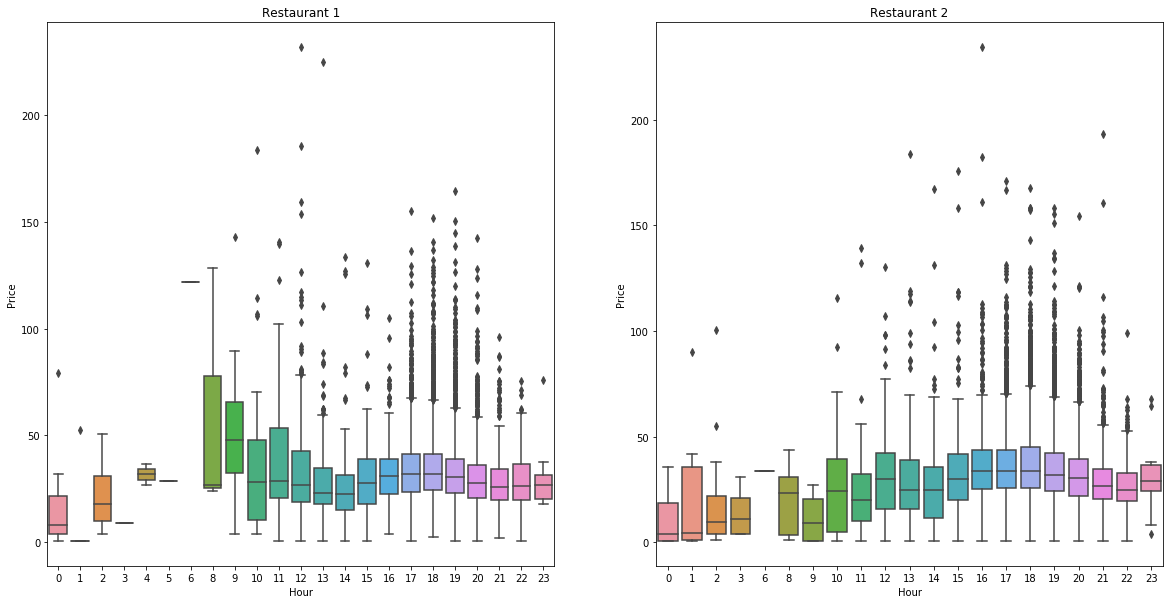

In [87]:
fig,ax=plt.subplots(1,2)
sns.boxplot(data=orderts_1, x=orderts_1.date.dt.hour , y='price', ax=ax[0])
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Hour')
ax[0].title.set_text('Restaurant 1')

sns.boxplot(data=orderts_2, x=orderts_2.date.dt.hour , y='price', ax=ax[1])
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Hour')
ax[1].title.set_text('Restaurant 2')


In [89]:
temp['order_number']=temp.index

In [95]:
temp.set_index(temp.date,inplace=True)

In [102]:
temp=temp.resample('D').agg({'total_products':np.sum,'price':np.sum,'order_number':np.max})

In [103]:
temp.head()

,total_products,price,order_number
date,,,
2016-07-26,8,33.10,2785.0
2016-07-27,11,41.00,2788.0
2016-07-28,10,45.30,2790.0
2016-07-29,60,308.60,2802.0
2016-07-30,57,239.25,2810.0


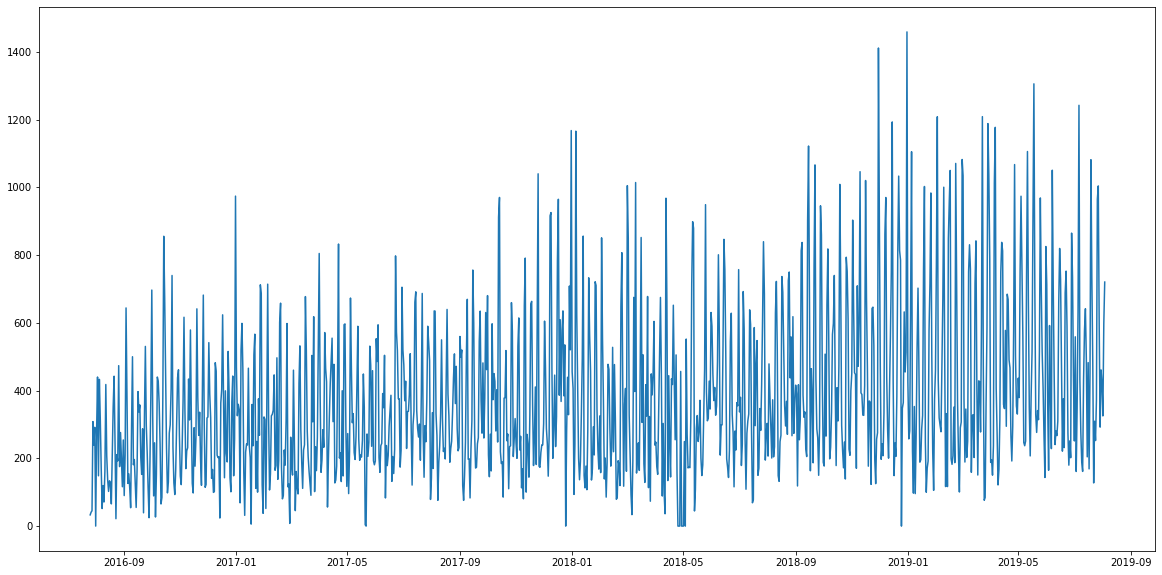

In [105]:
plt.plot(temp.index,temp.price)